In [6]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
# Paths to the data folders and files
ndvi_folder = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\Array\\NDVI-Array"
ndmi_folder = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\Array\\NDMI-Array"
csv_path = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\monthly_averages_formatted.csv"

In [8]:
# Load CSV data
climate_data = pd.read_csv(csv_path)

# Load NDVI data from npy files
ndvi_data = [np.load(os.path.join(ndvi_folder, f)) for f in os.listdir(ndvi_folder) if f.endswith('.npy')]

# Assuming climate data and NDVI data are aligned and sorted by date
features = climate_data[['Temp Average', 'PRECTOTCORR Average']].to_numpy()
labels = [np.mean(ndvi) for ndvi in ndvi_data]  # Example: use mean NDVI as the label

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Calculate and print the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.008712099217965447


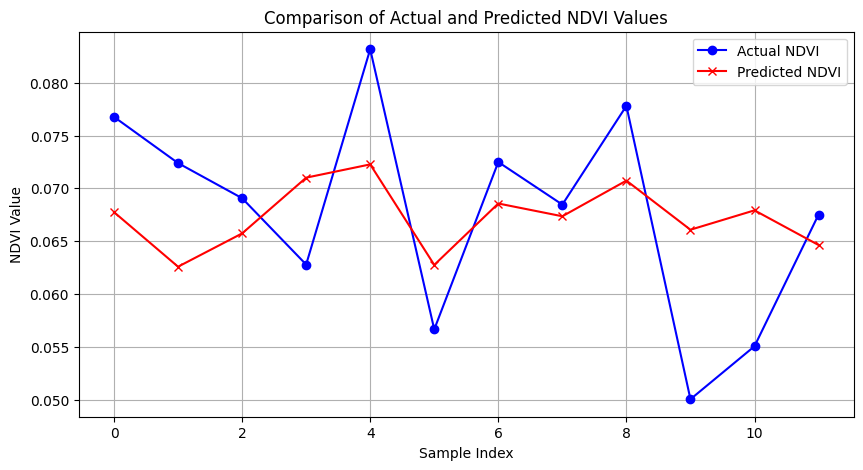

In [9]:
import matplotlib.pyplot as plt

# Assuming y_test and predictions are available from the previous model code
# y_test contains the actual NDVI values, predictions contain the predicted NDVI values

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual NDVI', color='blue', marker='o')
plt.plot(predictions, label='Predicted NDVI', color='red', marker='x')
plt.title('Comparison of Actual and Predicted NDVI Values')
plt.xlabel('Sample Index')
plt.ylabel('NDVI Value')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming paths to folders are defined
ndmi_folder = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\Array\\NDMI-Array"
climate_data = pd.read_csv("C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\monthly_averages_formatted.csv")

# Load NDMI data and calculate mean for each array
ndmi_means = []
for f in os.listdir(ndmi_folder):
    if f.endswith('.npy'):
        ndmi_array = np.load(os.path.join(ndmi_folder, f))
        ndmi_means.append(np.mean(ndmi_array))

# Ensure NDVI data is loaded and mean calculated (placeholder for NDVI loading)
# Assuming NDVI data is similarly structured and loaded as NDMI
ndvi_means = [np.mean(np.load(os.path.join(ndvi_folder, f))) for f in os.listdir(ndvi_folder) if f.endswith('.npy')]

# Prepare features and labels
features = pd.DataFrame({
    'Temperature': climate_data['Temp Average'],
    'Precipitation': climate_data['PRECTOTCORR Average'],
    'NDMI': ndmi_means  # Use mean NDMI values
})

labels = ndvi_means  # Use mean NDVI values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.00645848544831225
